In [1]:
cd /home/roberto/Desktop/romain_ic/wavemixing_project/py

/home/roberto/Desktop/romain_ic/wavemixing_project/py


In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("../post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("../plots"))
sys.path.insert(0, os.path.abspath("../hamiltonean_builder"))
sys.path.insert(0, os.path.abspath("../correlation"))
sys.path.insert(0, os.path.abspath("../single_and_double_excitations_subspace"))

In [3]:
from qutip import *
import matplotlib.pyplot as plt

from hamiltonean_builder.hamiltonean_builder import *
from helper_functions.operators import *
from plots.multi_plots import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from post_processing.local_calculations import *


In [4]:
def column(matrix, i, triD = False, j = 0):
    if triD != False:
        z_column = np.zeros(len(matrix))
        for z in range(len(matrix)):
            z_column[z] = matrix[z][i][j]
        return z_column  
    
    return [row[i] for row in matrix]

In [5]:
position_path = "./benchmarking/N6_Omega0.05_Delta0.0_b0_3_S_Int_On_Benchmarking_direct//positions/positions_N6_Omega0.05_Delta0.0_run0.dat"
rho_path = "./benchmarking/N6_Omega0.05_Delta0.0_b0_3_S_Int_On_Benchmarking_direct//N6_Omega0.05_Delta0.0_run0.dat"

ind = 8
position_1_path = f"./benchmarking/N6_Omega0.05_Delta0.0_b0_3_S_Int_On_Benchmarking_direct//positions/positions_N6_Omega0.05_Delta0.0_run{ind}.dat"
rho_1_path = f"./benchmarking/N6_Omega0.05_Delta0.0_b0_3_S_Int_On_Benchmarking_direct//N6_Omega0.05_Delta0.0_run{ind}.dat"

In [6]:
r =  get_positions_from_a_file(position_1_path)

Hdims = [[2 for i in range(len(r))], [2 for i in range(len(r))]]


rho = Qobj(file_data_read(rho_1_path), dims=Hdims)


In [7]:
N_atoms = len(r)
sigmam_i_expectations = np.zeros(len(r), dtype = "object")
sigmam_ij_expectations = np.zeros((len(r),len(r)), dtype = "object")

for i in range(len(r)):
    sigmam_i_expectations[i] = expect(rho, sigmam_i(N_atoms, i))
    for j in range(len(r)):
        sigmam_ij_expectations[i][j] = expect(rho, sigmam_i(N_atoms, i)*sigmam_i(N_atoms, j))
        
        

### Subspace solutions

In [8]:
b0 = 3



tf = 40
Omega = 0.05
Delta = 0
t_span, dt = np.linspace(0,tf,100, retstep = True) 

In [9]:
Delta1D, Omega1D, Gamma2D, Delta2D  = GetAllODEParametersGiven_r(Omega, Delta, r, scalar = True)

In [10]:
Beta1D_time_list, Beta2D_time_list, t_span, r = SolveForBeta1DandBeta2D(N_atoms, kd = None, b0 = None, exc_radius = None, Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, interaction = True, r = r, t_span = t_span  );

### Exact solutions Vector

In [11]:
V_H, V_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = b0, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = False, r = r)
rho_ss_V, total_time_ss = get_steadystate(V_H, 0, r,  0, V_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)


S_H, S_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = b0, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, r = r)
rho_ss_S, total_time_ss = get_steadystate(S_H, 0, r,  0, S_c_ops, N_atoms, faseglobal = 1, rho_ss = rho, rho_ss_parameter = "direct", tmax = None)

b0 system 3
kd system None
b0 system 3
kd system None


In [12]:
S_sigmam_i_expectations = np.zeros(len(r), dtype = "object")
S_sigmam_ij_expectations = np.zeros((len(r),len(r)), dtype = "object")

V_sigmam_i_expectations = np.zeros(len(r), dtype = "object")
V_sigmam_ij_expectations = np.zeros((len(r),len(r)), dtype = "object")


for i in range(len(r)):
    S_sigmam_i_expectations[i] = expect(rho_ss_S, sigmam_i(N_atoms, i))
    V_sigmam_i_expectations[i] = expect(rho_ss_V, sigmam_i(N_atoms, i))

    for j in range(len(r)):
        S_sigmam_ij_expectations[i][j] = expect(rho_ss_S, sigmam_i(N_atoms, i)*sigmam_i(N_atoms, j))
        V_sigmam_ij_expectations[i][j] = expect(rho_ss_V, sigmam_i(N_atoms, i)*sigmam_i(N_atoms, j))

        

# Single Excitation $\beta_j = \langle \sigma_j \rangle $

/home/roberto/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/roberto/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/roberto/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/roberto/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/roberto/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/roberto/minic

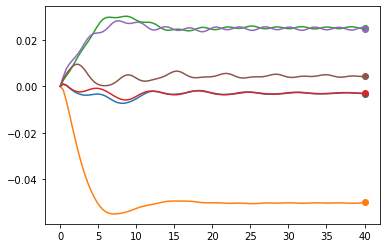

In [13]:
for i in range(len(r)):
    plt.plot(t_span, column(Beta1D_time_list, i))
    plt.scatter(t_span[-1], S_sigmam_i_expectations[i])
    #plt.scatter(t_span[-1], V_sigmam_i_expectations[i])

# Double Excitation $\beta_{ij} = \langle \sigma_i \sigma_j \rangle $

<ipython-input-4-3e91c55e5e6d>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  z_column[z] = matrix[z][i][j]
<ipython-input-4-3e91c55e5e6d>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  z_column[z] = matrix[z][i][j]
/home/roberto/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
<ipython-input-4-3e91c55e5e6d>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  z_column[z] = matrix[z][i][j]
/home/roberto/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
<ipython-input-4-3e91c55e5e6d>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  z_column[z] = matrix[z][i][j]
/home/roberto/miniconda3/lib/pytho

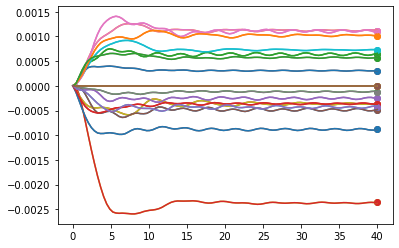

In [14]:
for i in range(len(r)):
    for j in range(len(r)):
        plt.plot(t_span, column(Beta2D_time_list, i, True, j))
        plt.scatter(t_span[-1],(S_sigmam_ij_expectations[i][j]))
        #plt.scatter(t_span[-1],(V_sigmam_ij_expectations[i][j]))

        #plt.ylim(-1,1)
        #plt.xlim(0,0.5)

# Second Correlation Function

In [15]:
taulist = np.array([0])
nhat = 1


ang1 = 25
R1 = get_nhat_from_angle(ang1)

ang2 = np.linspace(0, 360, 90)
R2_list = [] 
g2_zero_exact = []
g2_zero_approximated = []
V_g2_zero_exact = []


for theta in ang2:
        sys.stdout.write("\r{0}".format(theta))
        sys.stdout.flush()
        
        R2 = get_nhat_from_angle(theta)
        R2_list.append(get_nhat_from_angle(theta))
        
        g2_i = g2_l(S_H, nhat, r, R1, R2, taulist, S_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)[0]
        g2_zero_exact.append(g2_i)
        
        g2_i = g2_l(V_H, nhat, r, R1, R2, taulist, V_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)[0]        
        V_g2_zero_exact.append(g2_i)
        
        g2_i = np.real(g2_of_zero_subspace_approach(r, R1, R2, Beta1D_time_list[-1], Beta2D_time_list[-1]))
        g2_zero_approximated.append(g2_i)
        


 Summing on i =  5 

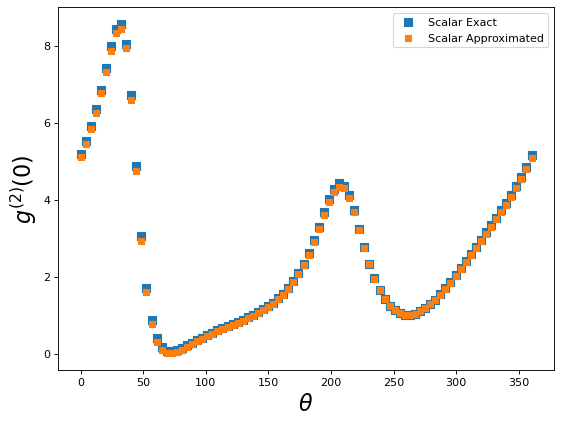

In [16]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(ang2, g2_zero_exact,label = "Scalar Exact", marker =  "s", s = 40)
plt.scatter(ang2, g2_zero_approximated, label = "Scalar Approximated", marker =  "s", s = 25)
#plt.scatter(ang2, V_g2_zero_exact, label = "Vector Exact", marker =  "o", s = 20)


plt.xlabel(r"$\theta$", size = 20)
plt.ylabel(r"$g^{(2)}(0)$", size = 20)
#plt.scatter([25],[2], marker =  "*", label = "Recife (Same direction)")
#plt.scatter([220],[1], marker =  "*", label = "Recife (Opposite direction)")
plt.legend()
plt.savefig(f"./benchmarking/V_benchmarking_N6_b0_3_Omega0.05Delta0_pos{ind}.jpg")

In [17]:
np.save(f"V_exact_pos{ind}.npy", V_g2_zero_exact )
np.save(f"S_exact_pos{ind}.npy", g2_zero_exact )
np.save(f"aproximated_pos{ind}.npy", g2_zero_approximated )